In [14]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from wordcloud import WordCloud

### importing the data 

In [15]:
df = pd.read_csv(r"C:\Users\chand\Downloads\stack_tags\train.csv")
df.head()

,Id,Title,Body,Tags,CreationDate,Y
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE
1,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ
2,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ
3,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ
4,34553755,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,<android><material-design><floating-action-but...,2016-01-01 05:21:48,HQ


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            45000 non-null  int64 
 1   Title         45000 non-null  object
 2   Body          45000 non-null  object
 3   Tags          45000 non-null  object
 4   CreationDate  45000 non-null  object
 5   Y             45000 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.1+ MB


In [17]:
df.drop(columns = ["Id","CreationDate","Y"], inplace = True)

In [ ]:
df.head(2)

In [ ]:
def clean_tags(s):
    '''
    This function converts the Tags in a space separated sentence.
    '''
    s=str(s)
    n=len(s)
    ls=[]
    for i in range(0,n):
        if s[i]=='<':
            for j in range(i+1,n):
                if s[j]=='>':
                    ls.append(s[i+1:j])
                    i=j+1
                    break
    s=" "
    s=s.join(ls)
    return s

tag=lambda s:clean_tags(s)
df['Tags']=pd.DataFrame(df.Tags.apply(tag))
print("Cleaning of Tags for train data is done....")

## Loading the data

In [7]:
df = pd.read_csv(r"C:\Users\chand\Downloads\stack_data.csv")
df.head()

,Title,Body,Tags
0,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,java repeat
1,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,java optional
2,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,javascript image overlay react-native opacity
3,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",swift operators whitespace ternary-operator op...
4,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,android material-design floating-action-button


In [9]:
def tag_count(x):
    x = len(x.split())
    return x

count = lambda x:tag_count(x)

df['TagCount'] = pd.DataFrame(df.Tags.apply(count))
print("The tag count is calculated...")

The tag count is calculated...


In [10]:
df.head(2)

,Title,Body,Tags,TagCount
0,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,java repeat,2
1,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,java optional,2


## Exploratory Data Analysis 

C:\Users\chand\AppData\Local\Temp\ipykernel_26192\3302003522.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sample_df, x='TagCount', palette='Set2')


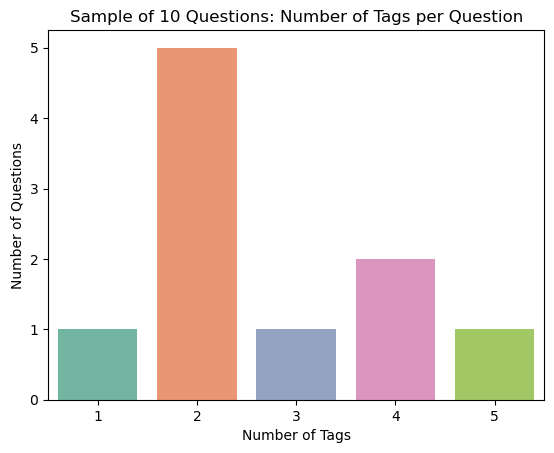

In [13]:
# Number of Tags per Question (Sample of 10)
# Take a sample of 10 records from the dataset

sample_df = df.sample(n=10, random_state=42)  # random_state for reproducibility

# Plot count of TagCount values from the sample
sns.countplot(data=sample_df, x='TagCount', palette='Set2')
plt.title("Sample of 10 Questions: Number of Tags per Question")
plt.xlabel("Number of Tags")
plt.ylabel("Number of Questions")
plt.show()


In [11]:
#df['TagCount'].describe
print("The max value of tags in a question are: ",df['TagCount'].max())
print("The min value of tags in a question are: ",df['TagCount'].min())

The max value of tags in a question are:  6
The min value of tags in a question are:  1


In [18]:
text = " ".join(df["Tags"].values)

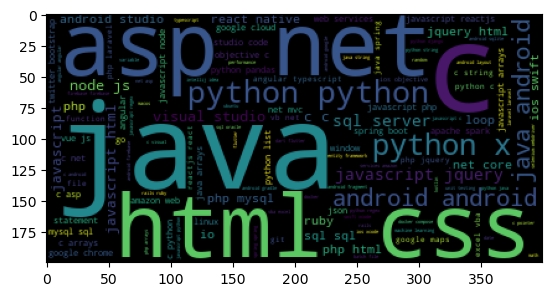

In [20]:
cloud = WordCloud()
data = cloud.generate_from_text(text)
plt.imshow(data)

In [13]:
from collections import Counter
tag_counts = Counter(tag for tags in df['Tags'] for tag in tags)
print(tag_counts.most_common(10))

[('a', 81918), (' ', 74425), ('e', 68932), ('t', 63745), ('r', 63352), ('s', 60871), ('i', 57913), ('o', 57050), ('n', 52239), ('c', 42094)]


In [14]:
df["Tags"]

0                                              java repeat
1                                            java optional
2            javascript image overlay react-native opacity
3        swift operators whitespace ternary-operator op...
4           android material-design floating-action-button
                               ...                        
44995                                c# asp.net sql-server
44996                                               python
44997                                        azure billing
44998                                            ios swift
44999                                     c# visual-studio
Name: Tags, Length: 45000, dtype: object

In [15]:
import pandas as pd
import numpy as np
import string
import re
import nltk
#nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, hamming_loss, classification_report

In [16]:
def cleaning(text):
    text = text.lower()
    pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    clean = re.compile('<.*?>')
    text = re.sub(clean,'',text)
    text = pattern.sub('', text)
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"that's", "that is", text)        
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"where's", "where is", text) 
    text = re.sub(r"\'ll", " will", text)  
    text = re.sub(r"\'ve", " have", text)  
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"did't", "did not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"couldn't", "could not", text)
    text = re.sub(r"have't", "have not", text)

    text = re.sub(r"[,.\"!@#$%^&*(){}?/;`~:<>+=-]", "", text)
    tokens = word_tokenize(text)
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    words = [word for word in stripped if word.isalpha()]
    text = ' '.join(words)
    return text

df['Title'] = df['Title'].map(cleaning)
print('Train data Title cleaned...')
df['Body'] = df['Body'].map(cleaning)
print('Train data Body cleaned...')

<>:3: SyntaxWarning: invalid escape sequence '\('
<>:3: SyntaxWarning: invalid escape sequence '\('
C:\Users\chand\AppData\Local\Temp\ipykernel_9976\2276455280.py:3: SyntaxWarning: invalid escape sequence '\('
  pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')


Train data Title cleaned...
Train data Body cleaned...


In [17]:
df.columns

Index(['Title', 'Body', 'Tags', 'TagCount'], dtype='object')

## Model Building 

In [30]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, f1_score, hamming_loss, classification_report
from datetime import datetime

# Step 1: Split raw data
X = df.drop(columns=["Tags", "TagCount"])
y = df["Tags"]  # raw text labels

X_train, X_test, y_train_raw, y_test_raw = train_test_split(X, y, test_size=0.2, random_state=27)

# Step 2: Combine Title and Body text
X_train_text = (X_train["Title"] + " " + X_train["Body"]).values.astype(str)
X_test_text = (X_test["Title"] + " " + X_test["Body"]).values.astype(str)

# Step 3: Initialize vectorizers with tokenizer=str.split (picklable)
vectorizerTF = TfidfVectorizer(
    min_df=0.00009,
    max_features=10000,
    smooth_idf=True,
    norm="l2",
    tokenizer=str.split,
    ngram_range=(1, 3)
)

vectorizerCV = CountVectorizer(
    tokenizer=str.split,
    binary=True,
    max_features=1500
)

# Step 4: Fit and transform features and labels
start = datetime.now()
X_train_multilabel = vectorizerTF.fit_transform(X_train_text)
X_test_multilabel = vectorizerTF.transform(X_test_text)

y_train_multilabel = vectorizerCV.fit_transform(y_train_raw)
y_test_multilabel = vectorizerCV.transform(y_test_raw)
print("Vectorization complete. Time taken:", datetime.now() - start)

# Step 5: Train classifier
classifier = OneVsRestClassifier(
    SGDClassifier(loss='hinge', alpha=0.00001, penalty='l2'),
    n_jobs=-1
)

start = datetime.now()
classifier.fit(X_train_multilabel, y_train_multilabel)
predictions = classifier.predict(X_test_multilabel)
print("Training and prediction complete. Time taken:", datetime.now() - start)

# Step 6: Evaluate
print("Accuracy:", accuracy_score(y_test_multilabel, predictions))
print("Macro F1 Score:", f1_score(y_test_multilabel, predictions, average='macro'))
print("Micro F1 Score:", f1_score(y_test_multilabel, predictions, average='micro'))
print("Hamming Loss:", hamming_loss(y_test_multilabel, predictions))
print("Classification Report:\n", classification_report(y_test_multilabel, predictions))


C:\Users\chand\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Vectorization complete. Time taken: 0:00:47.272665
Training and prediction complete. Time taken: 0:01:05.955762
Accuracy: 0.19077777777777777
Macro F1 Score: 0.09391729471335185
Micro F1 Score: 0.5150455325326646
Hamming Loss: 0.0010887407407407408
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.29      0.07      0.11        75
           2       0.75      0.33      0.46        36
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         1
          12       0.00 

C:\Users\chand\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\chand\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\chand\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\chand\anaconda3\Lib\site-package

## Model Prediction 

In [31]:
test = "This is a C++ question. Array index out of bound."
test = [cleaning(test)]
test = vectorizerTF.transform(test)
print(test.shape)

(1, 10000)


In [32]:
pred = classifier.predict(test)

In [33]:
print(pred)

  (0, 223)	1


In [34]:
# Step 1: Clean and transform the input
test = "This is a C++ question. Array index out of bound."
test_cleaned = [cleaning(test)]
test_vectorized = vectorizerTF.transform(test_cleaned)

# Step 2: Predict
pred = classifier.predict(test_vectorized)

# Step 3: Decode the predicted vector into tag labels
predicted_tags = vectorizerCV.inverse_transform(pred)

# Step 4: Print the results
print("Predicted Tags:", predicted_tags[0])


Predicted Tags: ['c#']


In [35]:
test = "This is a C++ question. Array index out of bound."
test_cleaned = cleaning(test)
print("Cleaned text:", test_cleaned)


Cleaned text: this is a c question array index out of bound


In [36]:
test_vectorized = vectorizerTF.transform([test_cleaned])
print("TF-IDF shape:", test_vectorized.shape)
print("Non-zero elements:", test_vectorized.nnz)


TF-IDF shape: (1, 10000)
Non-zero elements: 17


In [37]:
test = "How to fix index out of bounds in C++ array?"
test_cleaned = cleaning(test)
test_vectorized = vectorizerTF.transform([test_cleaned])
pred = classifier.predict(test_vectorized)
predicted_tags = vectorizerCV.inverse_transform(pred)
print("Predicted Tags:", predicted_tags[0])


Predicted Tags: ['c#']


In [38]:
test =  "ValueError in Pandas when merging two DataFrames"
test_cleaned = cleaning(test)
print("Cleaned:", test_cleaned)

test_vectorized = vectorizerTF.transform([test_cleaned])
print("TF-IDF non-zero features:", test_vectorized.nnz)

pred = classifier.predict(test_vectorized)
predicted_tags = vectorizerCV.inverse_transform(pred)

print("Predicted Tags:", predicted_tags[0])


Cleaned: valueerror in pandas when merging two dataframes
TF-IDF non-zero features: 7
Predicted Tags: ['dataframe' 'merge' 'pandas' 'python']


In [39]:
import pickle
pickle.dump(classifier,open('classifier.pkl','wb'))
pickle.dump(vectorizerTF,open('tfidf.pkl','wb'))
pickle.dump(vectorizerCV,open('CV.pkl','wb'))